<a href="https://colab.research.google.com/github/kimtaehyeokkkk/python/blob/main/202201055_%EA%B9%80%ED%83%9C%ED%98%81_%EC%8B%AC%EC%9E%A5%EB%B3%91_2%EB%B2%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving heart disease classification dataset.csv to heart disease classification dataset (6).csv
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 400)               3200      
                                                                 
 dense_49 (Dense)            (None, 400)               160400    
                                                                 
 dense_50 (Dense)            (None, 40)                16040     
                                                                 
 dense_51 (Dense)            (None, 1)                 41        
                                                                 
Total params: 179,681
Trainable params: 179,681
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
11/11 [==============================] - 1s 4ms/step - loss: 0.2621 - a

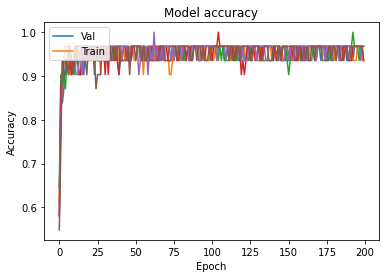

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

RANDOM_SEED = 3
np.random.seed(RANDOM_SEED) 
scaler = StandardScaler()

from google.colab import files
myfile = files.upload()

Data = pd.read_csv('heart disease classification dataset.csv')

df = Data

df.isnull().sum().sort_values(ascending=False).head(20)
df = pd.get_dummies(df)
df = df.fillna(df.mean())

df_corr = df.corr()
df_corr_sort = df_corr.sort_values('target_yes', ascending=False)

df_corr_sort['target_yes'].head(10)

cols_train = ['cp', 'thalach', 'slope', 'sex_female', 'sex_male', 'restecg', 'fbs']
x_train_pre = df[cols_train]
standardized_data = scaler.fit_transform(x_train_pre)

y = df['target_yes'].values

x_train, x_test, y_train, y_test = train_test_split(standardized_data, y, test_size = 0.1, random_state = 3) 

k = 6
skf = StratifiedKFold(n_splits = k, shuffle = True, random_state = 3)

for train, test in skf.split(standardized_data, y):
  model = Sequential()
  model.add(Dense(400, input_dim = x_train.shape[1], activation = 'relu'))
  model.add(Dense(400, activation = 'relu'))
  model.add(Dense(40, activation = 'relu'))
  model.add(Dense(1))
  model.summary()

  model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

  history = model.fit(x_test, y_test, epochs= 200, batch_size = 3)

  plt.plot(history.history['accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Val', 'Train'], loc = 'upper left')
  plt.show

score = model.evaluate(x_test, y_test)
print('accuracy: ', score[1])

